In [19]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: KR
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


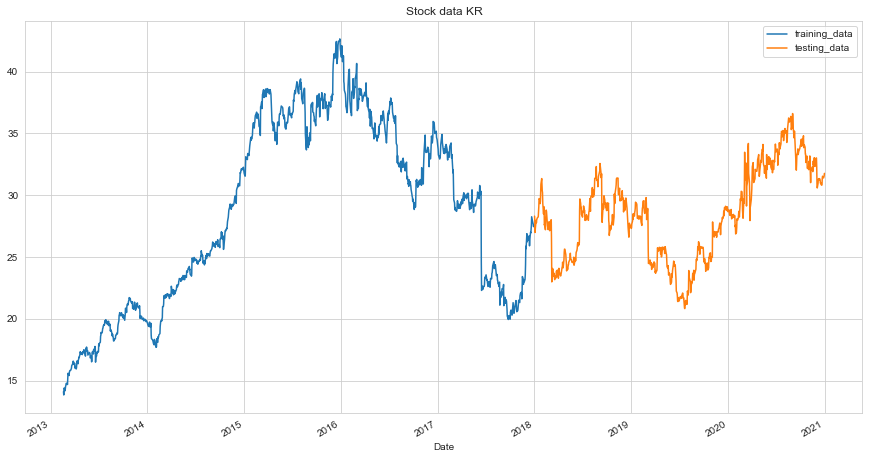

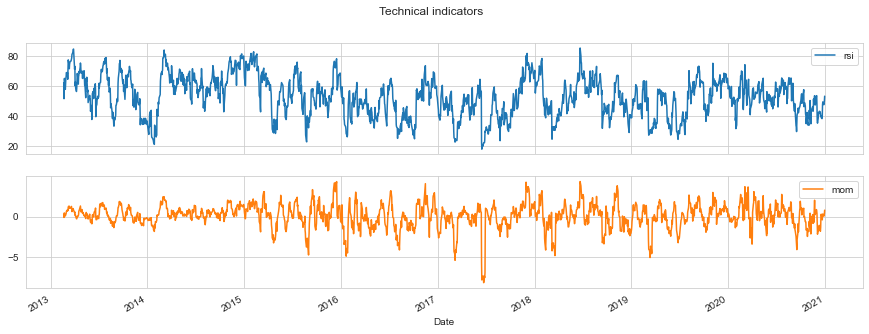

In [20]:
stock_name = 'kr'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [21]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1518.29, duration: 0:00:00.218062
episode: 2/2000, episode end value: 1499.99, duration: 0:00:00.170023
episode: 3/2000, episode end value: 1669.81, duration: 0:00:00.179048
episode: 4/2000, episode end value: 1555.02, duration: 0:00:00.188035
episode: 5/2000, episode end value: 1563.15, duration: 0:00:00.184055
episode: 6/2000, episode end value: 1681.13, duration: 0:00:00.180027
episode: 7/2000, episode end value: 1479.43, duration: 0:00:00.169038
episode: 8/2000, episode end value: 1409.65, duration: 0:00:00.181041
episode: 9/2000, episode end value: 1500.09, duration: 0:00:00.176040
episode: 10/2000, episode end value: 1437.90, duration: 0:00:00.188043
episode: 11/2000, episode end value: 1503.19, duration: 0:00:00.183039
episode: 12/2000, episode end value: 1489.33, duration: 0:00:00.197045
episode: 13/2000, episode end value: 1581.47, duration: 0:00:00.182041
episode: 14/2000, episode end value: 1505.23, duration: 0:00:00.210045
episode: 15/200

episode: 117/2000, episode end value: 1486.65, duration: 0:00:00.217034
episode: 118/2000, episode end value: 1502.46, duration: 0:00:00.208060
episode: 119/2000, episode end value: 1476.89, duration: 0:00:00.214050
episode: 120/2000, episode end value: 1476.50, duration: 0:00:00.215029
episode: 121/2000, episode end value: 1483.38, duration: 0:00:00.212063
episode: 122/2000, episode end value: 1472.40, duration: 0:00:00.237039
episode: 123/2000, episode end value: 1470.05, duration: 0:00:00.222050
episode: 124/2000, episode end value: 1411.33, duration: 0:00:00.225059
episode: 125/2000, episode end value: 1389.32, duration: 0:00:00.230058
episode: 126/2000, episode end value: 1382.16, duration: 0:00:00.222036
episode: 127/2000, episode end value: 1398.67, duration: 0:00:00.214065
episode: 128/2000, episode end value: 1453.06, duration: 0:00:00.211048
episode: 129/2000, episode end value: 1474.92, duration: 0:00:00.207047
episode: 130/2000, episode end value: 1474.13, duration: 0:00:00

episode: 231/2000, episode end value: 1479.05, duration: 0:00:00.217034
episode: 232/2000, episode end value: 1460.71, duration: 0:00:00.210047
episode: 233/2000, episode end value: 1477.98, duration: 0:00:00.209053
episode: 234/2000, episode end value: 1466.14, duration: 0:00:00.225048
episode: 235/2000, episode end value: 1472.23, duration: 0:00:00.218033
episode: 236/2000, episode end value: 1489.32, duration: 0:00:00.208060
episode: 237/2000, episode end value: 1498.47, duration: 0:00:00.219045
episode: 238/2000, episode end value: 1497.00, duration: 0:00:00.217055
episode: 239/2000, episode end value: 1486.86, duration: 0:00:00.220033
episode: 240/2000, episode end value: 1490.10, duration: 0:00:00.214062
episode: 241/2000, episode end value: 1481.75, duration: 0:00:00.215053
episode: 242/2000, episode end value: 1491.56, duration: 0:00:00.218043
episode: 243/2000, episode end value: 1472.96, duration: 0:00:00.211043
episode: 244/2000, episode end value: 1454.17, duration: 0:00:00

episode: 345/2000, episode end value: 1539.09, duration: 0:00:00.209060
episode: 346/2000, episode end value: 1480.61, duration: 0:00:00.220054
episode: 347/2000, episode end value: 1489.20, duration: 0:00:00.212046
episode: 348/2000, episode end value: 1472.07, duration: 0:00:00.213047
episode: 349/2000, episode end value: 1497.00, duration: 0:00:00.219050
episode: 350/2000, episode end value: 1476.70, duration: 0:00:00.217046
episode: 351/2000, episode end value: 1494.83, duration: 0:00:00.211063
episode: 352/2000, episode end value: 1485.42, duration: 0:00:00.215062
episode: 353/2000, episode end value: 1482.68, duration: 0:00:00.217047
episode: 354/2000, episode end value: 1474.36, duration: 0:00:00.221034
episode: 355/2000, episode end value: 1469.89, duration: 0:00:00.210063
episode: 356/2000, episode end value: 1520.69, duration: 0:00:00.206043
episode: 357/2000, episode end value: 1480.33, duration: 0:00:00.212033
episode: 358/2000, episode end value: 1493.63, duration: 0:00:00

episode: 459/2000, episode end value: 1461.54, duration: 0:00:00.215061
episode: 460/2000, episode end value: 1476.86, duration: 0:00:00.200047
episode: 461/2000, episode end value: 1461.67, duration: 0:00:00.211046
episode: 462/2000, episode end value: 1477.69, duration: 0:00:00.213055
episode: 463/2000, episode end value: 1474.70, duration: 0:00:00.218047
episode: 464/2000, episode end value: 1507.88, duration: 0:00:00.211051
episode: 465/2000, episode end value: 1462.10, duration: 0:00:00.226055
episode: 466/2000, episode end value: 1517.48, duration: 0:00:00.225038
episode: 467/2000, episode end value: 1514.23, duration: 0:00:00.207047
episode: 468/2000, episode end value: 1479.52, duration: 0:00:00.217047
episode: 469/2000, episode end value: 1482.66, duration: 0:00:00.209047
episode: 470/2000, episode end value: 1443.77, duration: 0:00:00.216066
episode: 471/2000, episode end value: 1463.52, duration: 0:00:00.216031
episode: 472/2000, episode end value: 1457.07, duration: 0:00:00

episode: 573/2000, episode end value: 1473.52, duration: 0:00:00.214031
episode: 574/2000, episode end value: 1494.29, duration: 0:00:00.208047
episode: 575/2000, episode end value: 1490.70, duration: 0:00:00.216049
episode: 576/2000, episode end value: 1492.94, duration: 0:00:00.225050
episode: 577/2000, episode end value: 1475.02, duration: 0:00:00.217049
episode: 578/2000, episode end value: 1455.44, duration: 0:00:00.217048
episode: 579/2000, episode end value: 1517.49, duration: 0:00:00.213048
episode: 580/2000, episode end value: 1459.01, duration: 0:00:00.208046
episode: 581/2000, episode end value: 1480.80, duration: 0:00:00.217049
episode: 582/2000, episode end value: 1507.17, duration: 0:00:00.211047
episode: 583/2000, episode end value: 1483.62, duration: 0:00:00.209047
episode: 584/2000, episode end value: 1457.32, duration: 0:00:00.215049
episode: 585/2000, episode end value: 1494.58, duration: 0:00:00.222049
episode: 586/2000, episode end value: 1498.59, duration: 0:00:00

episode: 687/2000, episode end value: 1477.81, duration: 0:00:00.215048
episode: 688/2000, episode end value: 1451.98, duration: 0:00:00.222049
episode: 689/2000, episode end value: 1464.98, duration: 0:00:00.216047
episode: 690/2000, episode end value: 1557.98, duration: 0:00:00.200046
episode: 691/2000, episode end value: 1474.27, duration: 0:00:00.214047
episode: 692/2000, episode end value: 1478.96, duration: 0:00:00.221049
episode: 693/2000, episode end value: 1488.09, duration: 0:00:00.217064
episode: 694/2000, episode end value: 1474.49, duration: 0:00:00.213034
episode: 695/2000, episode end value: 1492.34, duration: 0:00:00.211046
episode: 696/2000, episode end value: 1476.72, duration: 0:00:00.217049
episode: 697/2000, episode end value: 1479.04, duration: 0:00:00.223051
episode: 698/2000, episode end value: 1486.95, duration: 0:00:00.221051
episode: 699/2000, episode end value: 1458.97, duration: 0:00:00.218047
episode: 700/2000, episode end value: 1463.10, duration: 0:00:00

episode: 802/2000, episode end value: 1478.19, duration: 0:00:00.210048
episode: 803/2000, episode end value: 1497.22, duration: 0:00:00.210047
episode: 804/2000, episode end value: 1482.12, duration: 0:00:00.209034
episode: 805/2000, episode end value: 1470.81, duration: 0:00:00.217036
episode: 806/2000, episode end value: 1477.72, duration: 0:00:00.218062
episode: 807/2000, episode end value: 1492.44, duration: 0:00:00.215042
episode: 808/2000, episode end value: 1683.62, duration: 0:00:00.183048
episode: 809/2000, episode end value: 1495.88, duration: 0:00:00.214035
episode: 810/2000, episode end value: 1457.75, duration: 0:00:00.218049
episode: 811/2000, episode end value: 1478.84, duration: 0:00:00.211027
episode: 812/2000, episode end value: 1506.16, duration: 0:00:00.219063
episode: 813/2000, episode end value: 1485.43, duration: 0:00:00.213054
episode: 814/2000, episode end value: 1488.74, duration: 0:00:00.189030
episode: 815/2000, episode end value: 1536.70, duration: 0:00:00

episode: 916/2000, episode end value: 1486.24, duration: 0:00:00.216069
episode: 917/2000, episode end value: 1452.53, duration: 0:00:00.210040
episode: 918/2000, episode end value: 1479.66, duration: 0:00:00.214055
episode: 919/2000, episode end value: 1448.05, duration: 0:00:00.216048
episode: 920/2000, episode end value: 1525.96, duration: 0:00:00.212036
episode: 921/2000, episode end value: 1526.19, duration: 0:00:00.207045
episode: 922/2000, episode end value: 1480.37, duration: 0:00:00.222041
episode: 923/2000, episode end value: 1469.75, duration: 0:00:00.217048
episode: 924/2000, episode end value: 1471.27, duration: 0:00:00.212068
episode: 925/2000, episode end value: 1459.55, duration: 0:00:00.210047
episode: 926/2000, episode end value: 1467.52, duration: 0:00:00.215048
episode: 927/2000, episode end value: 1466.70, duration: 0:00:00.213048
episode: 928/2000, episode end value: 1492.83, duration: 0:00:00.209047
episode: 929/2000, episode end value: 1456.70, duration: 0:00:00

episode: 1030/2000, episode end value: 1484.85, duration: 0:00:00.215048
episode: 1031/2000, episode end value: 1498.31, duration: 0:00:00.206047
episode: 1032/2000, episode end value: 1462.81, duration: 0:00:00.215048
episode: 1033/2000, episode end value: 1475.81, duration: 0:00:00.218050
episode: 1034/2000, episode end value: 1475.61, duration: 0:00:00.219049
episode: 1035/2000, episode end value: 1463.49, duration: 0:00:00.208040
episode: 1036/2000, episode end value: 1465.60, duration: 0:00:00.220056
episode: 1037/2000, episode end value: 1490.90, duration: 0:00:00.222044
episode: 1038/2000, episode end value: 1511.24, duration: 0:00:00.206064
episode: 1039/2000, episode end value: 1484.51, duration: 0:00:00.222050
episode: 1040/2000, episode end value: 1505.19, duration: 0:00:00.219049
episode: 1041/2000, episode end value: 1527.12, duration: 0:00:00.214048
episode: 1042/2000, episode end value: 1457.47, duration: 0:00:00.217049
episode: 1043/2000, episode end value: 1497.25, dur

episode: 1143/2000, episode end value: 1481.33, duration: 0:00:00.219061
episode: 1144/2000, episode end value: 1458.94, duration: 0:00:00.205056
episode: 1145/2000, episode end value: 1502.96, duration: 0:00:00.216049
episode: 1146/2000, episode end value: 1464.88, duration: 0:00:00.218049
episode: 1147/2000, episode end value: 1569.60, duration: 0:00:00.191043
episode: 1148/2000, episode end value: 1454.47, duration: 0:00:00.211049
episode: 1149/2000, episode end value: 1535.43, duration: 0:00:00.211047
episode: 1150/2000, episode end value: 1478.76, duration: 0:00:00.234070
episode: 1151/2000, episode end value: 1482.89, duration: 0:00:00.218047
episode: 1152/2000, episode end value: 1444.74, duration: 0:00:00.221051
episode: 1153/2000, episode end value: 1455.65, duration: 0:00:00.212054
episode: 1154/2000, episode end value: 1462.68, duration: 0:00:00.214054
episode: 1155/2000, episode end value: 1524.70, duration: 0:00:00.208035
episode: 1156/2000, episode end value: 1460.66, dur

episode: 1256/2000, episode end value: 1461.57, duration: 0:00:00.218064
episode: 1257/2000, episode end value: 1485.37, duration: 0:00:00.206031
episode: 1258/2000, episode end value: 1491.64, duration: 0:00:00.209063
episode: 1259/2000, episode end value: 1462.39, duration: 0:00:00.213031
episode: 1260/2000, episode end value: 1445.49, duration: 0:00:00.210067
episode: 1261/2000, episode end value: 1530.12, duration: 0:00:00.206026
episode: 1262/2000, episode end value: 1465.46, duration: 0:00:00.222049
episode: 1263/2000, episode end value: 1469.90, duration: 0:00:00.216050
episode: 1264/2000, episode end value: 1473.06, duration: 0:00:00.209047
episode: 1265/2000, episode end value: 1519.20, duration: 0:00:00.207047
episode: 1266/2000, episode end value: 1499.47, duration: 0:00:00.213061
episode: 1267/2000, episode end value: 1488.50, duration: 0:00:00.213033
episode: 1268/2000, episode end value: 1472.07, duration: 0:00:00.216048
episode: 1269/2000, episode end value: 1450.11, dur

episode: 1370/2000, episode end value: 1469.10, duration: 0:00:00.224049
episode: 1371/2000, episode end value: 1452.25, duration: 0:00:00.219049
episode: 1372/2000, episode end value: 1474.49, duration: 0:00:00.220052
episode: 1373/2000, episode end value: 1548.19, duration: 0:00:00.208044
episode: 1374/2000, episode end value: 1500.71, duration: 0:00:00.209045
episode: 1375/2000, episode end value: 1475.44, duration: 0:00:00.216051
episode: 1376/2000, episode end value: 1518.38, duration: 0:00:00.220046
episode: 1377/2000, episode end value: 1479.80, duration: 0:00:00.214047
episode: 1378/2000, episode end value: 1463.48, duration: 0:00:00.226064
episode: 1379/2000, episode end value: 1450.49, duration: 0:00:00.210035
episode: 1380/2000, episode end value: 1510.07, duration: 0:00:00.213046
episode: 1381/2000, episode end value: 1529.36, duration: 0:00:00.211049
episode: 1382/2000, episode end value: 1469.89, duration: 0:00:00.215063
episode: 1383/2000, episode end value: 1446.26, dur

episode: 1483/2000, episode end value: 1550.70, duration: 0:00:00.213048
episode: 1484/2000, episode end value: 1493.03, duration: 0:00:00.198042
episode: 1485/2000, episode end value: 1483.07, duration: 0:00:00.218049
episode: 1486/2000, episode end value: 1500.65, duration: 0:00:00.237055
episode: 1487/2000, episode end value: 1462.78, duration: 0:00:00.207044
episode: 1488/2000, episode end value: 1462.37, duration: 0:00:00.242055
episode: 1489/2000, episode end value: 1525.24, duration: 0:00:00.268060
episode: 1490/2000, episode end value: 1475.75, duration: 0:00:00.248055
episode: 1491/2000, episode end value: 1510.96, duration: 0:00:00.266076
episode: 1492/2000, episode end value: 1471.78, duration: 0:00:00.273064
episode: 1493/2000, episode end value: 1472.98, duration: 0:00:00.234039
episode: 1494/2000, episode end value: 1478.98, duration: 0:00:00.270059
episode: 1495/2000, episode end value: 1479.86, duration: 0:00:00.297067
episode: 1496/2000, episode end value: 1502.27, dur

episode: 1596/2000, episode end value: 1471.00, duration: 0:00:00.214062
episode: 1597/2000, episode end value: 1468.47, duration: 0:00:00.211046
episode: 1598/2000, episode end value: 1467.79, duration: 0:00:00.210047
episode: 1599/2000, episode end value: 1442.23, duration: 0:00:00.224050
episode: 1600/2000, episode end value: 1463.05, duration: 0:00:00.211046
episode: 1601/2000, episode end value: 1506.58, duration: 0:00:00.211047
episode: 1602/2000, episode end value: 1476.76, duration: 0:00:00.211032
episode: 1603/2000, episode end value: 1536.88, duration: 0:00:00.208046
episode: 1604/2000, episode end value: 1496.32, duration: 0:00:00.206047
episode: 1605/2000, episode end value: 1470.00, duration: 0:00:00.220060
episode: 1606/2000, episode end value: 1514.79, duration: 0:00:00.203047
episode: 1607/2000, episode end value: 1475.17, duration: 0:00:00.213047
episode: 1608/2000, episode end value: 1455.84, duration: 0:00:00.208032
episode: 1609/2000, episode end value: 1477.52, dur

episode: 1709/2000, episode end value: 1446.76, duration: 0:00:00.212036
episode: 1710/2000, episode end value: 1495.14, duration: 0:00:00.210045
episode: 1711/2000, episode end value: 1471.41, duration: 0:00:00.218063
episode: 1712/2000, episode end value: 1455.45, duration: 0:00:00.215035
episode: 1713/2000, episode end value: 1509.89, duration: 0:00:00.206060
episode: 1714/2000, episode end value: 1456.14, duration: 0:00:00.219035
episode: 1715/2000, episode end value: 1487.89, duration: 0:00:00.209060
episode: 1716/2000, episode end value: 1475.06, duration: 0:00:00.221026
episode: 1717/2000, episode end value: 1460.33, duration: 0:00:00.209047
episode: 1718/2000, episode end value: 1469.88, duration: 0:00:00.211054
episode: 1719/2000, episode end value: 1461.23, duration: 0:00:00.213055
episode: 1720/2000, episode end value: 1463.31, duration: 0:00:00.213053
episode: 1721/2000, episode end value: 1454.86, duration: 0:00:00.219050
episode: 1722/2000, episode end value: 1472.74, dur

episode: 1822/2000, episode end value: 1462.27, duration: 0:00:00.207040
episode: 1823/2000, episode end value: 1476.03, duration: 0:00:00.213048
episode: 1824/2000, episode end value: 1469.02, duration: 0:00:00.214050
episode: 1825/2000, episode end value: 1454.11, duration: 0:00:00.211034
episode: 1826/2000, episode end value: 1458.52, duration: 0:00:00.206050
episode: 1827/2000, episode end value: 1464.00, duration: 0:00:00.214053
episode: 1828/2000, episode end value: 1470.62, duration: 0:00:00.216043
episode: 1829/2000, episode end value: 1460.92, duration: 0:00:00.211046
episode: 1830/2000, episode end value: 1459.31, duration: 0:00:00.213048
episode: 1831/2000, episode end value: 1471.86, duration: 0:00:00.214034
episode: 1832/2000, episode end value: 1476.06, duration: 0:00:00.217048
episode: 1833/2000, episode end value: 1484.45, duration: 0:00:00.199045
episode: 1834/2000, episode end value: 1462.68, duration: 0:00:00.203058
episode: 1835/2000, episode end value: 1477.82, dur

episode: 1936/2000, episode end value: 1474.29, duration: 0:00:00.208060
episode: 1937/2000, episode end value: 1464.37, duration: 0:00:00.222049
episode: 1938/2000, episode end value: 1447.95, duration: 0:00:00.220050
episode: 1939/2000, episode end value: 1467.96, duration: 0:00:00.216048
episode: 1940/2000, episode end value: 1507.54, duration: 0:00:00.215037
episode: 1941/2000, episode end value: 1463.56, duration: 0:00:00.206042
episode: 1942/2000, episode end value: 1477.62, duration: 0:00:00.217058
episode: 1943/2000, episode end value: 1447.12, duration: 0:00:00.219052
episode: 1944/2000, episode end value: 1472.61, duration: 0:00:00.220049
episode: 1945/2000, episode end value: 1471.26, duration: 0:00:00.223049
episode: 1946/2000, episode end value: 1458.70, duration: 0:00:00.222050
episode: 1947/2000, episode end value: 1474.93, duration: 0:00:00.218034
episode: 1948/2000, episode end value: 1469.20, duration: 0:00:00.210057
episode: 1949/2000, episode end value: 1551.15, dur

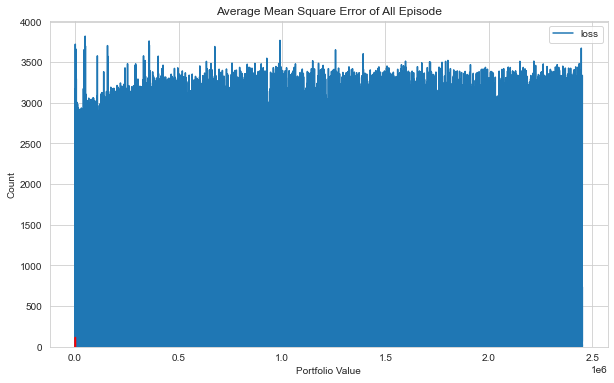

In [22]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

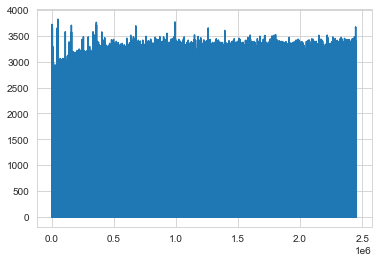

In [23]:
plt.plot(agent.model.losses)

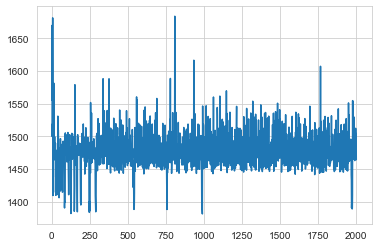

In [24]:
plt.plot(portfolio_value)

episode end value: 1218.47, duration: 0:00:00.099031
Sell: 399 times, Buy: 347 times


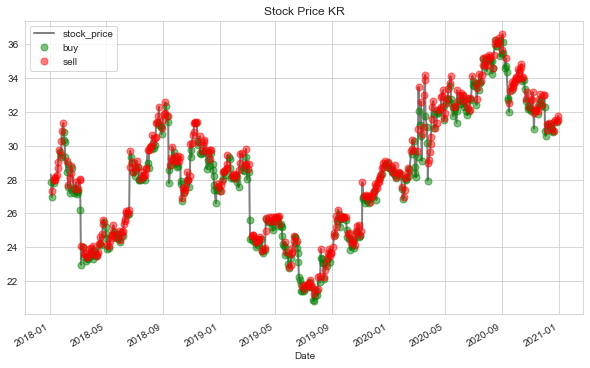

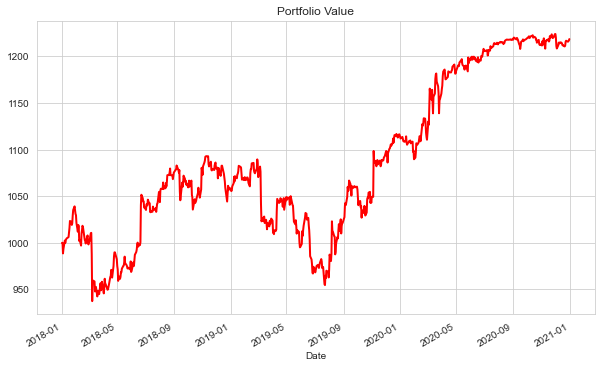

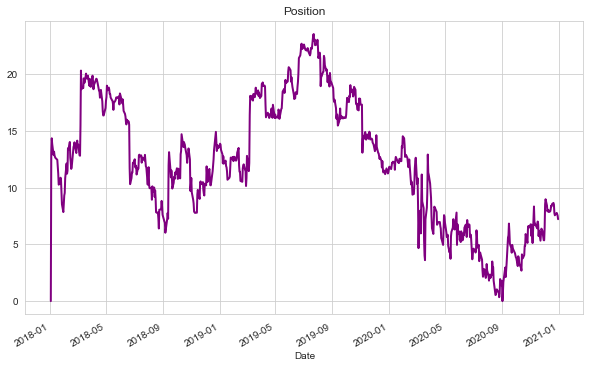

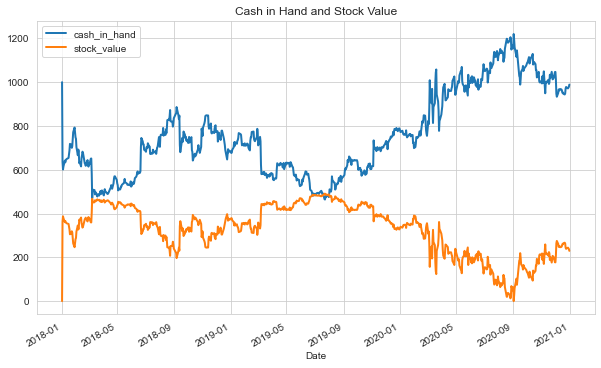

In [25]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [26]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: KR
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 6.81 %
Volatility: 0.1023
shape ratio: 0.5579
Maximun drawdown: -12.65 %
Calmar ratio: 0.5381
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 3.92 %
Volatility (benchmark): 0.3119
shape ratio: 0.0904
Maximun drawdown: -36.06 %
Calmar ratio (benchmark): 0.1087


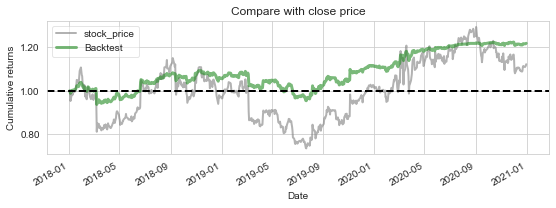

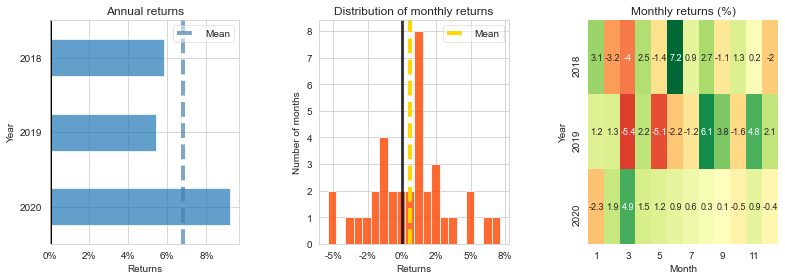

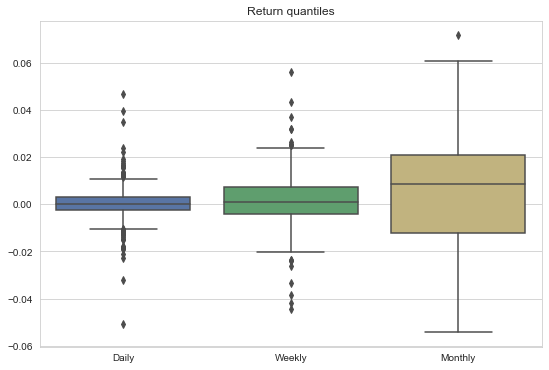

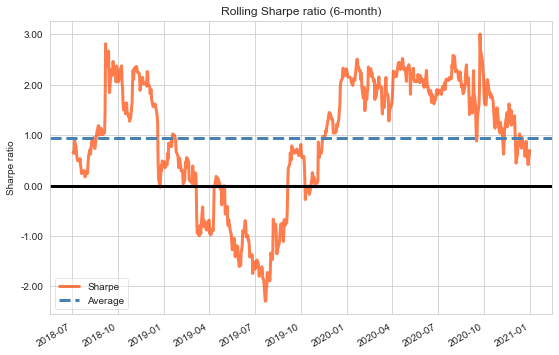

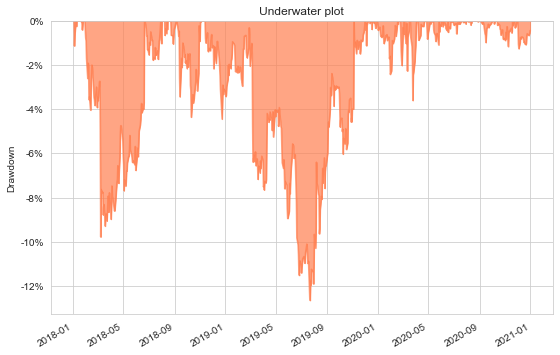

In [27]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')